## Problem: Counts path for a sum
LeetCode: 437. Path Sum III

https://leetcode.com/problems/path-sum-iii/

Given the root of a binary tree and an integer targetSum, return the number of paths where the sum of the values along the path equals targetSum.

The path does not need to start or end at the root or a leaf, but it must go downwards (i.e., traveling only from parent nodes to child nodes).

 

Example 1:

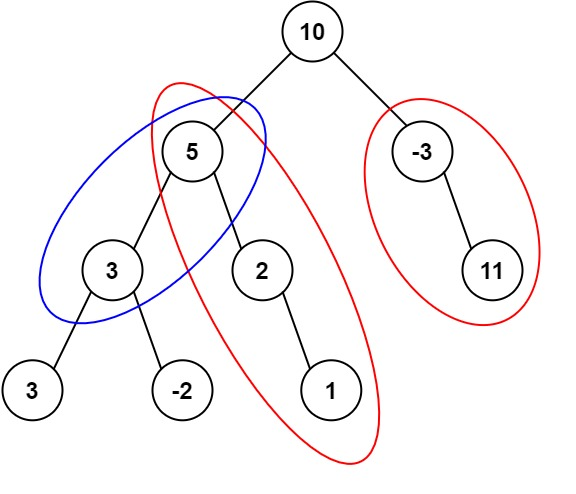

    Input: root = [10,5,-3,3,2,null,11,3,-2,null,1], targetSum = 8
    Output: 3
    Explanation: The paths that sum to 8 are shown.
Example 2:

    Input: root = [5,4,8,11,null,13,4,7,2,null,null,5,1], targetSum = 22
    Output: 3


Constraints:

    The number of nodes in the tree is in the range [0, 1000].
    -109 <= Node.val <= 109
    -1000 <= targetSum <= 1000

### Approach: 
This problem belongs to Tree-DFS pattern, as we have to traverse all nodes top to bottom to find the sum of nodes equal to Target sum.

We will use recursive approach. The trick here is that, the sum is not necessary to begin from root.
So, sum should be calculated from bottom node to top, if sum == target sum then count is increased by 1. And keep doing the sum as node's value can be negative also.
To have sum from bottom to top. Store node's value in array and keep checking the sum on each iteration.
Pop the value at the end of the function from array, this is for back tracking.


In [36]:
class Node:
    def __init__(self, val, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right
        
def pathSum(root, targetSum):
    return getPathSum(root, targetSum, [])
    
def getPathSum(root, targetSum, temp):
    if root is None:
        return 0
    temp.append(root.val)
    
    sum = 0
    count = 0
    for i in range(len(temp)-1, -1, -1):
        sum += temp[i]
        if targetSum == sum:
            count += 1
    count += getPathSum(root.left, targetSum, temp)
    count += getPathSum(root.right, targetSum, temp)
    temp.pop()
    return count

In [37]:
root = Node(10, Node(5, Node(3, Node(3), Node(-2)), Node(2, None, Node(1)) ), Node(-3, None, Node(11)))
pathSum(root, 8)

3

In [38]:
root = Node(10, Node(5, Node(3, Node(3), Node(-2)), Node(2, None, Node(1)) ), Node(-3, None, Node(11)))
pathSum(root, 6)

2

In [39]:
root = Node(10, Node(5, Node(3, Node(3), Node(-2)), Node(2, None, Node(1)) ), Node(-3, None, Node(11)))
pathSum(root, 18)

3

In [41]:
root = Node(5, Node(4,Node(11, Node(7), Node(2))), Node(8, Node(13), Node(4, Node(5), Node(1))))
pathSum(root, 22)

3